# Code to read in StarTrack data from Romagnolo 


In [1]:
# import re
# import pandas as pd
# import numpy as np

# def parse_dat_file_to_dataframe(filepath):
#     with open(filepath, 'r') as f:
#         content = f.read()

#     # Split blocks by blank lines (rows)
#     blocks = re.split(r'\n\s*\n', content.strip())
#     parsed_rows = []

#     for block in blocks:
#         lines = block.strip().split('\n')

#         if not lines:
#             continue

#         data = []
#         for line in lines[:-1]:
#             tokens = line.strip().split()
#             for token in tokens:
#                 try:
#                     val = float(token)
#                     data.append(val)
#                 except ValueError:
#                     data.append(np.nan)  # handle unexpected non-numeric values

#         # Append the last line as a single string
#         last_line = lines[-1].strip()
#         data.append(last_line)

#         parsed_rows.append(data)

#     # Find the maximum length row to standardize DataFrame shape
#     max_len = max(len(row) for row in parsed_rows)

#     # Pad rows with NaN where needed
#     padded_rows = [row[:-1] + [np.nan] * (max_len - len(row)) + [row[-1]] for row in parsed_rows]

#     # Create column names
#     col_names = [f"col_{i}" for i in range(max_len - 1)] + ["formation_channel"]

#     df = pd.DataFrame(padded_rows, columns=col_names)
#     return df

# # Example usage
# # if __name__ == "__main__":

# # S










In [2]:
import re
import pandas as pd
import numpy as np

# Column headers provided
column_names = [
    't', 'Ka', 'Kb', 'Ma', 'Mb', 'a', 'e', 'ta_end', 'tb_end', 'inbin',
    'a0', 'e0', 'Mzamsa', 'Mzamsb', 'idum_run', 'iidd_old',
    'Tms', 'Tmr', 'Vsm0_0', 'Vsm0_1', 'Vsm0_2', 'Vsm_0', 'Vsm_1', 'Vsm_2',
    'MpgaA', 'MpgbA', 'KpgaA', 'KpgbA', 'apgA', 'epgA', 'tpgA', 'MendaA', 'dMcea', 'ecssna',
    'MpgaB', 'MpgbB', 'KpgaB', 'KpgbB', 'apgB', 'epgB', 'tpgB', 'MendbB', 'dMceb', 'ecssnb',
    'aspina', 'aspinb', 'aspina0', 'aspinb0', 'i0', 'iA', 'iB', 'Mcoa', 'Mcob',
    'twra', 'awra', 'ewra', 'Mwra', 'Mcoma', 'twrb', 'awrb', 'ewrb', 'Mwrb', 'Mcomb',
    'a_0', 'e_0', 'i_0', 'Om_0', 'om_0', 'tau_0', 'a_0a', 'e_0a', 'i_0a', 'Om_0a', 'om_0a', 'tau_0a',
    'a_1', 'e_1', 'i_1', 'Om_1', 'om_1', 'tau_1', 'a_2', 'e_2', 'i_2', 'Om_2', 'om_2', 'tau_2',
    'jx0', 'jy0', 'jz0', 'jx1', 'jy1', 'jz1', 'jx2', 'jy2', 'jz2',
    'ttms1a', 'tthg1a', 'ttrgb1a', 'ttcheb1a', 'ttagb1a', 'tthems1a', 'tthehg1a', 'tthergb1a',
    'ttms1b', 'tthg1b', 'ttrgb1b', 'ttcheb1b', 'ttagb1b', 'tthems1b', 'tthehg1b', 'tthergb1b',
     'evo_track'
]

def parse_dat_file_to_dataframe(filepath):
    with open(filepath, 'r') as f:
        content = f.read()

    # Split blocks by blank lines (indicating new systems)
    blocks = re.split(r'\n\s*\n', content.strip())
    parsed_rows = []

    for block in blocks:
        lines = block.strip().split('\n')
        if not lines:
            continue

        values = []
        for line in lines[:-1]:
            tokens = line.strip().split()
            for token in tokens:
                try:
                    values.append(float(token))
                except ValueError:
                    values.append(np.nan)  # Unexpected junk value

        # Final line is the evo_track (as a single string)
        evo_track = lines[-1].strip()
        values.append(evo_track)

        # Pad if the row is short
        if len(values) < len(column_names):
            values += [np.nan] * (len(column_names) - len(values))

        # Truncate if too long (safety)
        values = values[:len(column_names)]

        parsed_rows.append(values)

    df = pd.DataFrame(parsed_rows, columns=column_names)
    return df

# # Example usage
# if __name__ == "__main__":
#     filepath = "/mnt/data/example_file_startrack.dat"
#     df = parse_dat_file_to_dataframe(filepath)

#     # Show a sample
#     print(df.head())

#     # Save to CSV
# df.to_csv("parsed_startrack_data.csv", index=False)


In [3]:
# lines that you will have to change 
path = '/Users/floorbroekgaarden/Downloads/GROWL/Romagnolo24/ST_ouput/default/' # you will have to change this to your local folder
# filepath = "/mnt/data/example_file_startrack.dat"
file_name = 'compact_0001.dat' # example of one of the files (but we can change this)



In [4]:
# read in the data 

filepath = path+file_name
df = parse_dat_file_to_dataframe(filepath)

# Show a sample
print(df.head())




           t    Ka    Kb         Ma         Mb             a         e  \
0  11.708709  14.0  14.0  11.414257   4.357860     11.394120  0.349769   
1   4.769680  14.0  14.0  31.051682  22.275211  97231.857539  0.029125   
2   5.084995  14.0  14.0  37.215386  25.029006   1154.709717  0.004119   
3   4.969125  14.0  14.0  47.678754  31.764784    291.470700  0.004136   
4   5.171991  14.0  14.0  20.900415  19.077695   2671.941739  0.001107   

     ta_end     tb_end  inbin  ...  tthergb1a     ttms1b     tthg1b  ttrgb1b  \
0  7.038558  11.708708    1.0  ...       -1.0  10.840801  10.857242     -1.0   
1  4.223470   4.769679    1.0  ...       -1.0   4.369367   4.373377     -1.0   
2  3.926147   5.084994    1.0  ...       -1.0   4.706962   4.710495     -1.0   
3  3.637252   4.969124    1.0  ...       -1.0   4.637975   4.640623     -1.0   
4  5.072463   5.171990    1.0  ...       -1.0   4.736727   4.741116     -1.0   

    ttcheb1b  ttagb1b   tthems1b   tthehg1b  tthergb1b  \
0  11.660618    

In [5]:
# Plot some data 

# print(df['col_0']) # these are the final compact object masses 
M1 = df['Ma'].values # 'final mass of star 1 that was the more massive one on ZAMS in [Msun]'
print(M1)

M2 = df['Mb'].values ## 'final mass of star 1 that was the more massive one on ZAMS in [Msun]' [double chekc]
print(M2)


[11.414257 31.051682 37.215386 ... 11.869893 38.841533 18.363017]
[ 4.35786  22.275211 25.029006 ...  8.444063 20.447119 20.369935]


## let's do some plotting 

In [6]:
import matplotlib.pyplot as plt



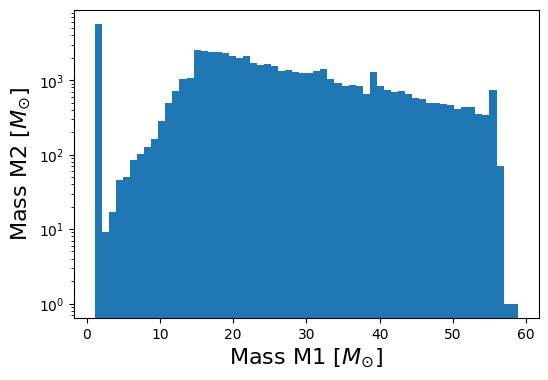

In [7]:
f, ax= plt.subplots(ncols=1,nrows=1, figsize=(6,4))
ax.hist(M1, bins=60)
ax.set_xlabel('Mass M1 $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Mass M2 $[M_{\odot}]$', fontsize=16)
ax.set_yscale('log')

plt.show()



## Fancy Fancy plotting (in case you are interested) 

In [8]:
import astropy.constants as c
import astropy.units  as u

## you can undo the lines below (but it will be fun for making fancy plots!)
# to make the lines below work, you have to download the file 'PostProcessingScripts' from https://github.com/FloorBroekgaarden/common_code
# and put this in the same directory as this one, and then only use the bottom line from this code below 
import sys
sys.path.append('../common_code') 
from PostProcessingScripts import * 



### example usage of layoutAxes to make fancy plots

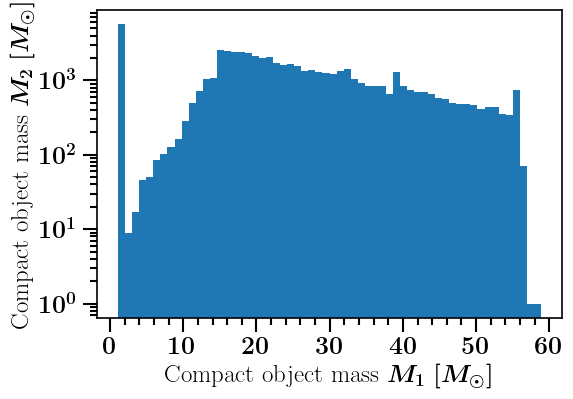

In [9]:
f, ax= plt.subplots(ncols=1,nrows=1, figsize=(6,4))
ax.hist(M1, bins=60)

#make fancy plot: 
fontsize=16
xlabel = 'Compact object mass $M_1$ $[M_{\odot}]$'
ylabel = 'Compact object mass $M_2$ $[M_{\odot}]$'
layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel, fontsize=18) # this line is where the magic happens

ax.set_yscale('log')

plt.show()